In [7]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [8]:
# Load CSV file with image labels
csv_file = 'D:\\ChickenDisease\\train_data.csv'
df = pd.read_csv(csv_file)

# Define paths
train_dir = 'D:\ChickenDisease\Train'  # Replace with your Train folder path
img_height, img_width = 224, 224  # Standard image size for ResNet
batch_size = 32

In [9]:
# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and prepare training data
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df,
    directory=train_dir,
    x_col='images',  # Column name in Excel with image filenames
    y_col='label',   # Column name in Excel with labels
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 8067 validated image filenames belonging to 4 classes.


In [10]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

C:\Users\DELL\PycharmProjects\PythonProject1\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

C:\Users\DELL\PycharmProjects\PythonProject1\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 595s 2s/step - accuracy: 0.5667 - loss: 1.1936
Epoch 2/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 155us/step - accuracy: 0.6250 - loss: 0.9894
Epoch 3/20


C:\Users\DELL\PycharmProjects\PythonProject1\.venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


252/252 ━━━━━━━━━━━━━━━━━━━━ 523s 2s/step - accuracy: 0.7475 - loss: 0.7167
Epoch 4/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 104us/step - accuracy: 0.6562 - loss: 0.8027
Epoch 5/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 523s 2s/step - accuracy: 0.7704 - loss: 0.6563
Epoch 6/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 80us/step - accuracy: 0.8750 - loss: 0.4253
Epoch 7/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 575s 2s/step - accuracy: 0.7796 - loss: 0.6308
Epoch 8/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 179us/step - accuracy: 0.7500 - loss: 0.6845
Epoch 9/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 630s 2s/step - accuracy: 0.8011 - loss: 0.5639
Epoch 10/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 143us/step - accuracy: 0.6562 - loss: 0.8725
Epoch 11/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 580s 2s/step - accuracy: 0.8119 - loss: 0.5215
Epoch 12/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 100us/step - accuracy: 0.7812 - loss: 0.5465
Epoch 13/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 561s 2s/step - accuracy: 0.8391 - loss: 0.4734
Epoch 14/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 10

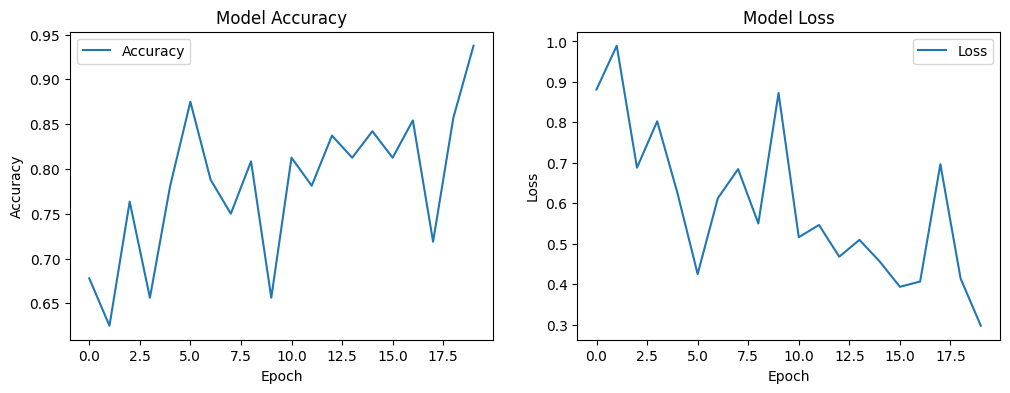

In [11]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    verbose=1
)

# Plot training results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
# Save the model
model.save('fecal_classifier_model.h5')